# Mini-Project 2

Welcome to your second Mini-Project! You will use numpy to build neural networks to predict the house price in Boston. Look for "TODO" inside the code block and complete the required tasks.

---
**Note**: In this project you can **ONLY** use numpy and matplotlib packages.

## Problem Description
 This data was collected in 1978 and each of the 506 entries represents aggregate information about homes from various suburbs located in Boston. Once you get a good fit, you can use this model to predict the monetary value of a house located at the Boston’s area. A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

The dataset will be like:

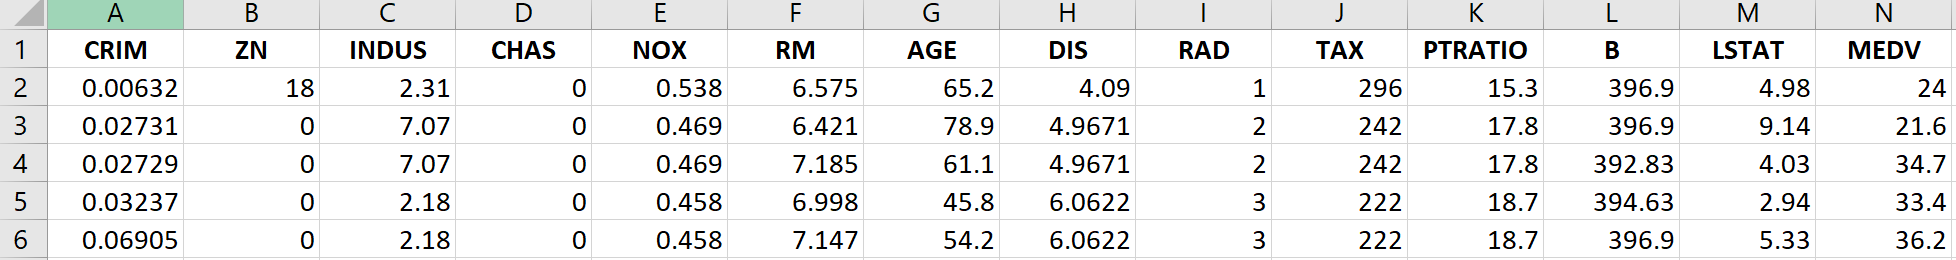

**Features**:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000usd
- PTRATIO: pupil-teacher ratio by town
- B: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT: percentage lower status of the population

**Label**:
- MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1: Read and Preprocess Data

In this section, you will implement the `DataPreprocessing` utility class to provide the training data and the test data for the downstream regressor based on Neural Networks.

### Task 1.1: Implement utility class

**Requirements:**

- Use `np.fromfile('filename.data', sep=" ")` to read data.
- Usually, the raw dataset will be **randomly** divided into training set and test set according to the given size of the training set.
- **Min-max scaler** transforms features X by scaling each feature to a given range $[a, b]$. The transformation is given by:
$$X_{\text{std}}=\frac{X - X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$
$$X_{\text{scaled}}=X_{\text{std}}\cdot(b-a) + a$$

In [2]:
# Set import path to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
class DataPreProcessing:
    def __init__(self):
        pass
    
    @staticmethod
    def read_data(file, separator):
        """
        Use the Numpy function fromfile() to load the dataset from the given file.
        
        Parameters
        ----------
        file: string
            String path of the data file.
        separator: string
            Separator between items if file is a text file.

        Return
        ----------
        data: ndarray
            Data read from the given file.
        """
        # TODO: write your code here
        data = np.fromfile(file, sep=separator) # Read data from file
        data = data.reshape(506, 14) # Reshape data based on samples and features/labels
        return data
    

    @staticmethod
    def train_test_split(data, train_size, shuffle=True):
        """
        Split the given data into random train and test subsets. 
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        train_size: float
            The proportion of the dataset to include in the train split.
        shuffle: bool
            Whether or not to shuffle the data before splitting.

        Return
        ----------
        train_data: ndarray
            Output of the training data.
        test_data: ndarray
            Output of the test data.
        """
        # TODO: write your code here
        if shuffle:
            np.random.shuffle(data) # Shuffle data rows
        split_idx = [int(len(data)*train_size)] # Index to split data
        train_data, test_data = np.split(data, split_idx) # Split data array
        return train_data, test_data

    @staticmethod
    def minmax_scale(X, feature_range=(0, 1)):
        """
        Transform features X by scaling each feature to a given range.
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        feature_range: tuple
            Desired range of transformed data.

        Return
        ----------
        X_scaled: ndarray
            Output of the scaled features.
        """
        # TODO: write your code here
        X_scaled = np.interp(X, (np.min(X), np.max(X)), feature_range) # Scale to the given range
        return X_scaled

### Task 1.2 Apply utility class

Apply your implemented utility class to complete the data reading and preprocessing.

**Requirements**:
- `X_train` should be an $n\times m$ matrix where $n$ is the number of features and $m$ is the number of training examples. In this project, $n=13$ and $m=\lfloor0.8\times506\rfloor$.
- The shape of `y_train` should be $1\times m$ where $m$ is the number of training examples.
- `X_test` and `y_test` should have the similar shape.

In [4]:
# Init the train size
train_size = 0.8

# TODO: init an object of DataPreProcessing
dataPreProc = DataPreProcessing()

# TODO: read the data from the data file
file = "gdrive/My Drive/AuE-8930 Deep Learning/Mini-Project 2/housing.data"
sep = " "
data = dataPreProc.read_data(file, sep)

# TODO: split the data random train and test subsets.
train_data, test_data = dataPreProc.train_test_split(data, train_size, shuffle=True)

# TODO: split the training subset into X_train and y_train
X_train = np.zeros((train_data.shape[0], train_data.shape[1]-1)) # Array to store X_train data
y_train = np.zeros((train_data.shape[0], 1)) # Array to store y_train data
i = 0 # Index iterator
for row in train_data:
    X_train[i] = row[:-1]
    y_train[i] = row[-1]
    i += 1

# TODO: split the test subset into X_test and y_test
X_test = np.zeros((test_data.shape[0], test_data.shape[1]-1)) # Array to store X_train data
y_test = np.zeros((test_data.shape[0], 1)) # Array to store y_train data
i = 0 # Index iterator
for row in test_data:
    X_test[i] = row[:-1]
    y_test[i] = row[-1]
    i += 1

# TODO: 0-1 scale X_train and X_test respectively
X_train = dataPreProc.minmax_scale(X_train)
X_test = dataPreProc.minmax_scale(X_test)

# TODO: reshape X_train, X_test, y_train, and y_test to satisfy the requirments
X_train = X_train.T # Transpose
y_train = y_train.T # Transpose
X_test = X_test.T # Transpose
y_test = y_test.T # Transpose

In [5]:
# Test code
assert X_train.shape == (13, 404), "X_train should be a 13 by 404 matrix."
assert y_train.shape == (1, 404), "y_train should be a 1 by 404 matrix."
assert X_test.shape == (13, 102), "X_test should be a 13 by 102 matrix."
assert y_test.shape == (1, 102), "y_test should be a 1 by 102 matrix."

print('Great')

Great


## Task 2: Shallow Neural Network
In this task, you will create a shallow neural network with **only one hidden layer** to predict the Boston house price.

### Task 2.1: Initialize model parameters
Since the model is a two-layer (one hidden layer and an output layer) neural network, model parameters will be $W_1$, $b_1$, $W_2$, and $b_2$. In this task, you should implement a function of `init_params` to initialize parameters based on [He method](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78).

**Hints:**
- $W_1$ should be an $l_1\times l_0$ matrix where $l_1$ is the hidden layer size and $l_0$ is the feaure dimension of input samples.
- $b_1$ should be an $l_1\times1$ matrix.
- $W_2$ and $b_2$ should have the silimar dimensionality.
- Use `np.random.randn()` to generate random values.

In [6]:
def init_params(input_layer_size, hidden_layer_size, output_layer_size):
    """
    Initialize model parameters based on He initialization method.
        
    Parameters
    ----------
    input_layer_size: int
        Number of features in the input sample.
    hidden_layer_size: int
        Number of neurons in the hidden layer.
    output_layer_size: int
        Number of neurons in the output layer.

    Return
    ----------
    W1: ndarray
        Output of initialized W1.
    b1: ndarray
        Output of initialized b1.
    W2: ndarray
        Output of initialized W2.
    b2: ndarray
        Output of initialized b2.
    """
    # TODO: write your code here
    W1 = np.random.randn(hidden_layer_size, input_layer_size) * np.sqrt(2/input_layer_size) # W1 init
    b1 = np.random.randn(hidden_layer_size, 1) * np.sqrt(2/input_layer_size) # b1 init
    W2 = np.random.randn(output_layer_size, hidden_layer_size) * np.sqrt(2/hidden_layer_size) # W2 init
    b2 = np.random.randn(output_layer_size, 1) * np.sqrt(2/hidden_layer_size) # b2 init
    return W1, b1, W2, b2

### Task 2.2: Implement ReLU activation function
ReLU is the most common activation function used in neural networks. Implement the ReLU function and use it in your model.
$$a = \begin{cases}
   z &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

$$\frac{da}{dz} = \begin{cases}
   1 &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

In [7]:
def relu(Z, derivative=False):
    """
    If derivative=False, return the result transformed by the ReLU function.
    If derivative=True, return the result transformed by the derivative of the ReLU function.

    Parameters
    ----------
    Z: ndarray
        Input of the given data.
    derivative: bool.
        Whether or not to take the derivative of the ReLU function.

    Return
    ----------
    A: ndarray
        Output of the transformed matrix.
    """
    # TODO: write your code here
    if derivative:
        A = np.ones(Z.shape) if Z.all() > 0 else np.zeros(Z.shape) # da/dz
    else:
        A = Z if Z.all() > 0 else np.zeros(Z.shape) # a
    return A

### Task 2.3: Implement forward propagation function
The forward function is used to define how your model is going to be run, from input to output.

**Hints:**
- Computations in the forward propagation:
$$Z^{[1]}=W^{[1]}X+b^{[1]}$$
$$A^{[1]}=g(Z^{[1]})$$
$$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$
$$\hat{y}=g(Z^{[2]})$$
where $g()$ is the ReLU activation function.

In [8]:
def forward(X, W1, b1, W2, b2):
    """
    Generates output predictions for the input samples with given params.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarray
        Output of the output layer.
    """
    # TODO: write your code here
    Z1 = W1@X + b1 # Output of hidden layer 1
    A1 = relu(Z1) # Activation function
    Z2 = W2@A1 + b2 # Output of output layer 2
    A2 = relu(Z2) # Activation function
    return Z1, A1, Z2, A2

### Task 2.4: Implement loss function
For this regression problem, we will use mean squared error (MSE) as the loss function.
$$J=\frac{1}{2m}\sum_{i=1}^m\left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [9]:
def loss(y_truth, y_pred):
    """
    Return the mean squared error between the ground truth and predictions.
        
    Parameters
    ----------
    y_truth: ndarray
        An 1 x m matrix of ground truth.
    y_pred: ndarray
        An 1 x m matrix of predictions.

    Return
    ----------
    loss: float
        Output of the mean squared error.
    """
    # TODO: write your code here
    loss = 0.5*np.mean(np.square(np.subtract(y_truth, y_pred))) # MSE
    return loss

### Task 2.5: Implement backpropagation function
The backward calculates the gradient of the loss function with respect to the neural network's weights and intercepts.


In [10]:
def backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2):
    """
    Return the gradient of the loss function with respect to the model's weights.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    y: ndarray
        An 1 x m matrix of ground truth.
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer.
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarry
        Output of the output layer.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.
    """
    # TODO: write your code here
    dZ2 = A2 - y # Gradient of second layer (for MSE loss function)
    dW2 = (1/X.shape[1])*dZ2@A1.T # Gradient of weights of second layer
    db2 = (1/X.shape[1])*np.sum(dZ2, axis=1, keepdims=True) # Gradient of bias of second layer
    dZ1 = W2.T@dZ2*relu(Z1, derivative=True) # Gradient of first layer
    dW1 = (1/X.shape[1])*dZ1@X.T # Gradient of weights of first layer
    db1 = (1/X.shape[1])*np.sum(dZ1, axis=1, keepdims=True) # Gradient of bias of second layer
    return dW1, db1, dW2, db2

### Task 2.6: Implement update function
In this part, we will update model parameters according to the generated gradients.
$$W:=W-\alpha\cdot dW$$
$$b:=b-\alpha\cdot db$$

In [11]:
def update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2):
    """
    Return updated parameters based on the gradient descent optimization. 
        
    Parameters
    ----------
    lr: float
        Learning rate.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.

    Return
    ----------
    W1_: ndarray
        Updated weights of the hidden layer.
    b1_: ndarray
        Updated intercepts of the hidden layer.
    W2_: ndarray
        Updated weights of the output layer.
    b2_: ndarray
        Updated intercepts of the output layer.
    """
    # TODO: write your code here
    W1_ = W1 - lr*dW1 # Update W1
    b1_ = b1 - lr*db1 # Update b1
    W2_ = W2 - lr*dW2 # Update W2
    b2_ = b2 - lr*db2 # Update b2
    return W1_, b1_, W2_, b2_

### Task 2.7: Implement train function
So far, you have implemented functions that are required to train the neural network model. It's time to organize them and complete the training step. Let's keep moving on!

**Note:** Since you have learned how to create mini-batches in Mini-Project 1, just directly use the given `create_batches()`.

In [12]:
def create_batches(X, y, batch_size):
    """
    Split the data X and y with given batch size.

    Parameters
    ----------
    X: ndarray
        Features with shape n by m.
    y: ndarray
        Labels with shape k by m.
    batch_size: int
        Batch size.

    Return
    ----------
    batches_X: list
        Created small batches of X.
    batches_y: list
        Created small batches of y.
    """
    # Get the number of examples
    m = X.shape[1]
    # Get label dimension
    k = y.shape[0]

    # Init variables to save batches
    batches_X = []
    batches_y = []
    
    # Combine X and y
    data = np.vstack((X, y))
    np.random.shuffle(data.T)
        
    # Calcuate the number of mini batches
    n_minibatches = m // batch_size 

    for i in range(n_minibatches): 
        mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    # Handle the rest data
    if m % batch_size != 0: 
        mini_batch = data[:, n_minibatches * batch_size:]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    return batches_X, batches_y

In [13]:
def train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs):
    """
    Train the model based on the mini-batch graient descent.

    Parameters
    ----------
    X_train: ndarray
        Features of the training data with shape n by m1.
    y_train: ndarray
        Labels of the training data with shape 1 by m1.
    X_test: ndarray
        Features of the training data with shape n by m2.
    y_test: ndarray
        Labels of the training data with shape 1 by m2.
    W1: ndarray
        Initial weights of the hidden layer.
    b1: ndarray
        Initial intercepts of the hidden layer.
    W2: ndarray
        Initial weights of the output layer.
    b2: ndarray
        Initial intercepts of the output layer.
    lr: float
        Learning rate.
    batch_size: int
        Batch size.
    epochs: int
        Number of epochs to train the model. An epoch is an iteration over 
        the entire x and y data provided.

    Return
    ----------
    training_loss_history: list
        Each entry stands for the average training loss of all iterations in a certain epoch.
    test_loss_history: list
        A record of test losses.
    """
    training_loss_history = [] # Empty list to store train loss
    test_loss_history = []  # Empty list to store test loss
    for i in range(epochs):
        batches_X, batches_y = create_batches(X_train, y_train, batch_size) # Create mini-batches for training samples
        train_loss = 0 # Reset train_loss after each epoch
        test_loss = 0 # Reset test_loss after each epoch
        for j in range(len(batches_X)):
            Z1, A1, Z2, A2 = forward(batches_X[j], W1, b1, W2, b2) # Forward propagation
            train_loss += loss(batches_y[j], A2) # Compute training loss
            dW1, db1, dW2, db2 = backward(batches_X[j], batches_y[j], Z1, A1, Z2, A2, W1, b1, W2, b2) # Back propagation
            W1, b1, W2, b2 = update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2) # Update parameters
        training_loss_history.append(train_loss/len(batches_X)) # Append current train loss to history list
        Z1_test, A1_test, Z2_test, A2_test = forward(X_test, W1, b1, W2, b2) # Test predictions
        test_loss = loss(y_test, A2_test) # Compute test loss
        test_loss_history.append(test_loss) # Append current test loss to history list
    return training_loss_history, test_loss_history

### Task 2.8: Run your network
Congratulations! You have done everything to build a neural network. Run your model and plot the training losses and test losses in the **same** figure where x-axis is epoch. 

In [14]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
hidden_layer_size = 13

# TODO: initialize model parameters
W1, b1, W2, b2 = init_params(13, hidden_layer_size, 1)

# TODO: train the model
train_loss_history, test_loss_history = train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs)

### Task 2.9: Visualize training process

Plot out the training loss curve and the test loss curve in the same figure.

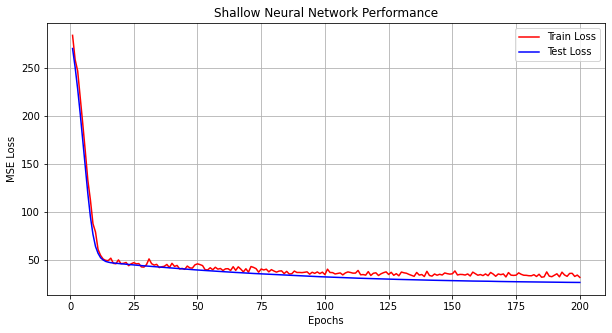

In [15]:
# TODO: plot the training history
plt.figure(figsize=(10, 5)) # Figure size in inches
plt.plot(np.linspace(1, epochs, epochs), train_loss_history, label='Train Loss', color='red') # Plot train loss
plt.plot(np.linspace(1, epochs, epochs), test_loss_history, label='Test Loss', color='blue') # Plot test loss
plt.title('Shallow Neural Network Performance')
plt.legend(loc='upper right') # Show legend
plt.xlabel('Epochs') # Show label for X-axis
plt.ylabel('MSE Loss') # Show label for Y-axis
plt.grid(True) # Show grid
plt.show() # Show plot

## Task 3: Deep Neural Network
Hopefully, you have mastered shallow neural networks after finishing Task 2. Let's move to the deep neural network. In this task, you will be asked to implement the `DNN` class that can be utilized to create deep neural networks with the given model configuration.

### Task 3.1: Implement DNN class
Unlike Task 2, you should try another programming model called Object-oriented programming (OOP). Don't be overwhelmed with the following code. You can efficiently complete this task by reusing most of your code in Task 2.

In [16]:
class DNN:
    def __init__(self, input_size, layer_sizes, epochs=100, lr=0.001, batch_size=64):
        """
        Parameters
        ----------
        input_size: int
            Number of features in the inputs.
        layer_sizes: list
            Number of units in each hidden layer and the output. 
        epochs: int
            Number of epochs to train the model
        lr: float
            Learning rate.
        batch_size: int
            Batch size.
        """
        self.input_size = input_size
        self.layer_sizes = layer_sizes
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

        # Init model parameters
        self.params = self._init_params()
    
    def _init_params(self):
        """ 
        Initialize model parameters based on He method.

        Return
        ----------
        params: dict
            Initialized model parameters represented by key-value pairs.
        """
        # TODO: write your code here
        params = {} # Initialize empty dictionary
        params.update({"W1": np.random.randn(self.layer_sizes[0], self.input_size) * np.sqrt(2/self.input_size)}) # Weights for first layers
        params.update({"b1": np.random.randn(self.layer_sizes[0], 1) * np.sqrt(2/self.input_size)}) # Biases for first layer
        for i in range(len(self.layer_sizes)-1):
            params.update({"W"+str(i+2): np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i]) * np.sqrt(2/self.layer_sizes[i])}) # Weights for hidden layers
            params.update({"b"+str(i+2): np.random.randn(self.layer_sizes[i+1], 1) * np.sqrt(2/self.layer_sizes[i])}) # Biases for hidden layers
        return params
    
    def _relu(self, Z, derivative=False):
        """
        If derivative=False, return the result transformed by the ReLU function.
        If derivative=True, return the result transformed by the derivative of the ReLU function.

        Parameters
        ----------
        Z: ndarray
            Input of the given data.
        derivative: bool.
            Whether or not to take the derivative of the ReLU function.

        Return
        ----------
        A: ndarray
            Output of the transformed matrix.
        """
        # TODO: write your code here
        if derivative:
            A = np.ones(Z.shape) if Z.all() > 0 else np.zeros(Z.shape) # da/dz
        else:
            A = Z if Z.all() > 0 else np.zeros(Z.shape) # a
        return A


    def _forward(self, X):
        """
        Generates output predictions for the input samples with given params.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.

        Return
        ----------
        output_layers: dict
            Outputs of each layer represented by key-value pairs.
        """
        # TODO: write your code here
        output_layers = {} # Initialize empty dictionary
        output_layers.update({"Z1": self.params.get("W1")@X + self.params.get("b1")}) # Outputs for first layer
        output_layers.update({"A1": self._relu(output_layers.get("Z1"))}) # Activations for first layer
        for i in range(len(self.layer_sizes)-1):
            output_layers.update({"Z"+str(i+2): self.params.get("W"+str(i+2))@output_layers.get("A"+str(i+1)) + self.params.get("b"+str(i+2))}) # Outputs for hidden layers
            output_layers.update({"A"+str(i+2): self._relu(output_layers.get("Z"+str(i+2)))}) # Activations for hidden layers
        return output_layers
    
    @staticmethod
    def mse(y_truth, y_pred):
        """
        Return the mean squared error between the ground truth and predictions.
            
        Parameters
        ----------
        y_truth: ndarray
            An 1 x m matrix of ground truth.
        y_pred: ndarray
            An 1 x m matrix of predictions.

        Return
        ----------
        loss: float
            Output of the mean squared error.
        """
        # TODO: write your code here
        loss = 0.5*np.mean(np.square(np.subtract(y_truth, y_pred))) # MSE
        return loss
    
    def _backward(self, X, y, output_layers):
        """
        Return the gradient of the loss function with respect to the model's weights.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.
        y: ndarray
            An 1 x m matrix of ground truth.
        output_layers: dict
            Outputs of each layer represented by key-value pairs.

        Return
        ----------
        gradients: dict
            Gradients of weights and intercepts at each layers.
        """
        # TODO: write your code here
        gradients = {} # Initialize empty dictionary
        gradients.update({"dZ"+str(len(self.layer_sizes)): output_layers.get("A"+str(len(self.layer_sizes))) - y}) # Gradients for last layer (for MSE loss function)
        gradients.update({"dW"+str(len(self.layer_sizes)): (1/X.shape[1]) * gradients.get("dZ"+str(len(self.layer_sizes))) @ output_layers.get("A"+str(len(self.layer_sizes)-1)).T}) # Gradients of weights for last layer
        gradients.update({"db"+str(len(self.layer_sizes)): (1/X.shape[1]) * np.sum(gradients.get("dZ"+str(len(self.layer_sizes))), axis=1, keepdims=True)}) # Gradients of biases for last layer
        for i in range(len(self.layer_sizes)-2):
            gradients.update({"dZ"+str(len(self.layer_sizes)-(i+1)): self.params.get("W"+str(len(self.layer_sizes)-i)).T @ gradients.get("dZ"+str(len(self.layer_sizes)-i)) * self._relu(output_layers.get("Z"+str(len(self.layer_sizes)-(i+1))), derivative=True)}) # Gradients for hidden layers (for MSE loss function)
            gradients.update({"dW"+str(len(self.layer_sizes)-(i+1)): (1/X.shape[1]) * gradients.get("dZ"+str(len(self.layer_sizes)-(i+1))) @ output_layers.get("A"+str(len(self.layer_sizes)-(i+2))).T}) # Gradients of weights for hidden layers
            gradients.update({"db"+str(len(self.layer_sizes)-(i+1)): (1/X.shape[1]) * np.sum(gradients.get("dZ"+str(len(self.layer_sizes)-(i+1))), axis=1, keepdims=True)}) # Gradients of biases for hidden layers       
        gradients.update({"dZ"+str(1): self.params.get("W"+str(2)).T @ gradients.get("dZ"+str(2)) * self._relu(output_layers.get("Z"+str(1)), derivative=True)}) # Gradients for first layer (for MSE loss function)
        gradients.update({"dW"+str(1): (1/X.shape[1]) * gradients.get("dZ"+str(1)) @ X.T}) # Gradients of weights for first layer
        gradients.update({"db"+str(1): (1/X.shape[1]) * np.sum(gradients.get("dZ"+str(1)), axis=1, keepdims=True)}) # Gradients of biases for first layer
        return gradients
    
    def _update(self, gradients):
        """
        Update network parameters according to the update rule of gradient descent. 
            
        Parameters
        ----------
        gradients: dict
            Parameter gradients.
        """
        # TODO: write your code here
        for i in range(len(self.layer_sizes)-1):
            self.params.update({"W"+str(i+1): self.params.get("W"+str(i+1)) - self.lr * gradients.get("dW"+str(i+1))}) # Update weights
            self.params.update({"b"+str(i+1): self.params.get("b"+str(i+1)) - self.lr * gradients.get("db"+str(i+1))})   # Update biases

    def train(self, X_train, y_train, X_test, y_test):
        """
        Train the model based on mini-batch graient descent.

        Parameters
        ----------
        X_train: ndarray
            Features of the training data with shape n by m1.
        y_train: ndarray
            Labels of the training data with shape 1 by m1.
        X_test: ndarray
            Features of the training data with shape n by m2.
        y_test: ndarray
            Labels of the training data with shape 1 by m2.

        Return
        ----------
        training_loss_history: list
            Entries are average training losses of all iterations in one epoch.
        test_loss_history: list
            A record of test loss values.
        """
        # TODO: write your code here
        training_loss_history = [] # Empty list to store train loss
        test_loss_history = []  # Empty list to store test loss
        for i in range(self.epochs):
            batches_X, batches_y = self._create_batches(X_train, y_train, self.batch_size) # Create mini-batches for training samples
            train_loss = 0 # Reset train_loss after each epoch
            test_loss = 0 # Reset test_loss after each epoch
            for j in range(len(batches_X)):
                output_layers = self._forward(batches_X[j]) # Forward propagation
                train_loss += self.mse(batches_y[j], output_layers.get("A"+str(len(self.layer_sizes)))) # Compute training loss
                gradients = self._backward(batches_X[j], batches_y[j], output_layers) # Back propagation
                self._update(gradients) # Update parameters

            training_loss_history.append(train_loss/len(batches_X)) # Append current train loss to history list
            output_layers_test = self._forward(X_test) # Test predictions
            test_loss = self.mse(y_test, output_layers_test.get("A"+str(len(self.layer_sizes)))) # Compute test loss
            test_loss_history.append(test_loss) # Append current test loss to history list
        return training_loss_history, test_loss_history
    
    def _create_batches(self, X, y, batch_size):
        """
            Split X and y into small batches with given batch size.

            Parameters
            ----------
            X: ndarray
                Features with shape n by m.
            y: ndarray
                Labels with shape k by m.
            batch_size: int
                Batch size.

            Return
            ----------
            batches_X: list
                Created small batches of X.
            batches_y: list
                Created small batches of y.
        """
        # Get the number of examples
        m = X.shape[1]
        # Get label dimension
        k = y.shape[0]

        # Init variables to save batches
        batches_X = []
        batches_y = []
        
        # Combine X and y
        data = np.vstack((X, y))
        np.random.shuffle(data.T)
            
        # Calcuate the number of mini batches
        n_minibatches = m // batch_size 

        for i in range(n_minibatches): 
            mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        # Handle the rest data
        if m % batch_size != 0: 
            mini_batch = data[:, n_minibatches * batch_size:]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        return batches_X, batches_y

### Task 3.2: Run your model
Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [17]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
layer_sizes = [15, 13, 8, 1]

# TODO: create an instance of your DNN class
NN = DNN(13, layer_sizes, epochs, lr, batch_size)

# TODO: train the model
NN._forward(X_train)
training_loss_history, test_loss_history = NN.train(X_train, y_train, X_test, y_test)

### Task 3.3: Visualize performance

Plot out the training loss curve and the test loss curve in the same figure.

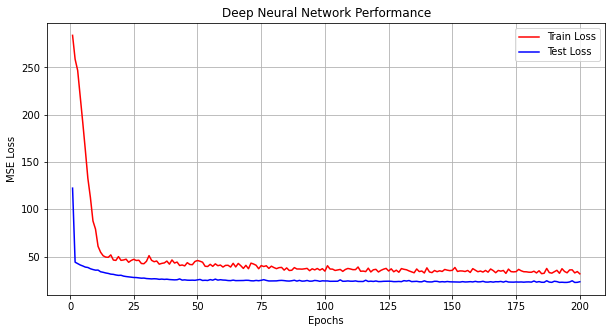

In [18]:
# TODO: plot the training history
plt.figure(figsize=(10, 5)) # Figure size in inches
plt.plot(np.linspace(1, epochs, epochs), train_loss_history, label='Train Loss', color='red') # Plot train loss
plt.plot(np.linspace(1, epochs, epochs), test_loss_history, label='Test Loss', color='blue') # Plot test loss
plt.title('Deep Neural Network Performance')
plt.legend(loc='upper right') # Show legend
plt.xlabel('Epochs') # Show label for X-axis
plt.ylabel('MSE Loss') # Show label for Y-axis
plt.grid(True) # Show grid
plt.show() # Show plot